In [42]:
%load_ext autoreload
%autoreload 2

import sys 
import pandas as pd

sys.path.append("..")

import analizer as an


# pd.set_option('max_columns', 200)

# Data import
df_origin = pd.read_excel('report.xls')
# df_origin = pd.read_excel('./Igor/report_full.xlsx')

df_full = an.prepare_columns(df_origin)
df_orders = an.extend_with_grid_details(df_full)

df_orders = df_orders.sort_values(by='OPEN_DT', ascending=False)

df_grids = an.get_grids(df_orders)

# df_full = df_full[df_full['OPEN_DT'].dt.date >= datetime.date(2023, 6, 19)]
# df_orders = df_orders[df_orders['OPEN_DT'].dt.date >= datetime.date(2023, 6, 19)]
# df_grids = df_grids[df_grids['OPEN_DT'].dt.date >= datetime.date(2023, 6, 19)]


df_sum = an.get_summary(df_full=df_full,
                        df_orders=df_orders,
                        df_grids=df_grids)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/sournk/dev/rf-history/research/../analizer/__init__.py:210: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_res.loc[(df_res['SIDE'] == TYPE_FOR_BALANCE) & (df_res['PROFIT'] > 0) & (df_res['COMMENT'].str.contains(COMMENT_PATTERN_FOR_DEPOSIT)), ['DK_DEPOSIT']] = df_res['PROFIT']


# 01. Account Summary

Период: 2023-05-26 - 2023-06-23
Календарных дней: 28
Торговых дней: 21

Баланс: $14,242.62
Пополнений: $13,383.47
Снятий: $0.00
Прочие движения: $0.02

Собственных средств: $13,383.47

Прибыль: $859.14
Средняя прибыль в календарный день: $30.68
Средняя прибыль в торговый день: $40.91

ROA: 6.0%
ROA календарных дней: 464

ROI: 6.4%
ROI календарных дней: 436

Ордеров: 1,111
Прибыльных: 785
Win Rate: 70.7%
Прибыль ордера: AVG=$0.77 | MAX=$270.18
Убыток ордера: MAX=$-34.35

Cеток однонаправленных: 510
Лот на $1000 депозита: MIN=0.0120 | AVG=0.0143 | MAX=0.0160 | LAST=0.0147
Ордеров в сетке: AVG=2.1 | MAX=14
Прибыль сетки: AVG=$1.68 | MAX=$195.89
Просадка сетки: AVG=-$5.34 | MAX=-$738.23
Просадка сетки от депозита: AVG=0.1% | MAX=7.0%


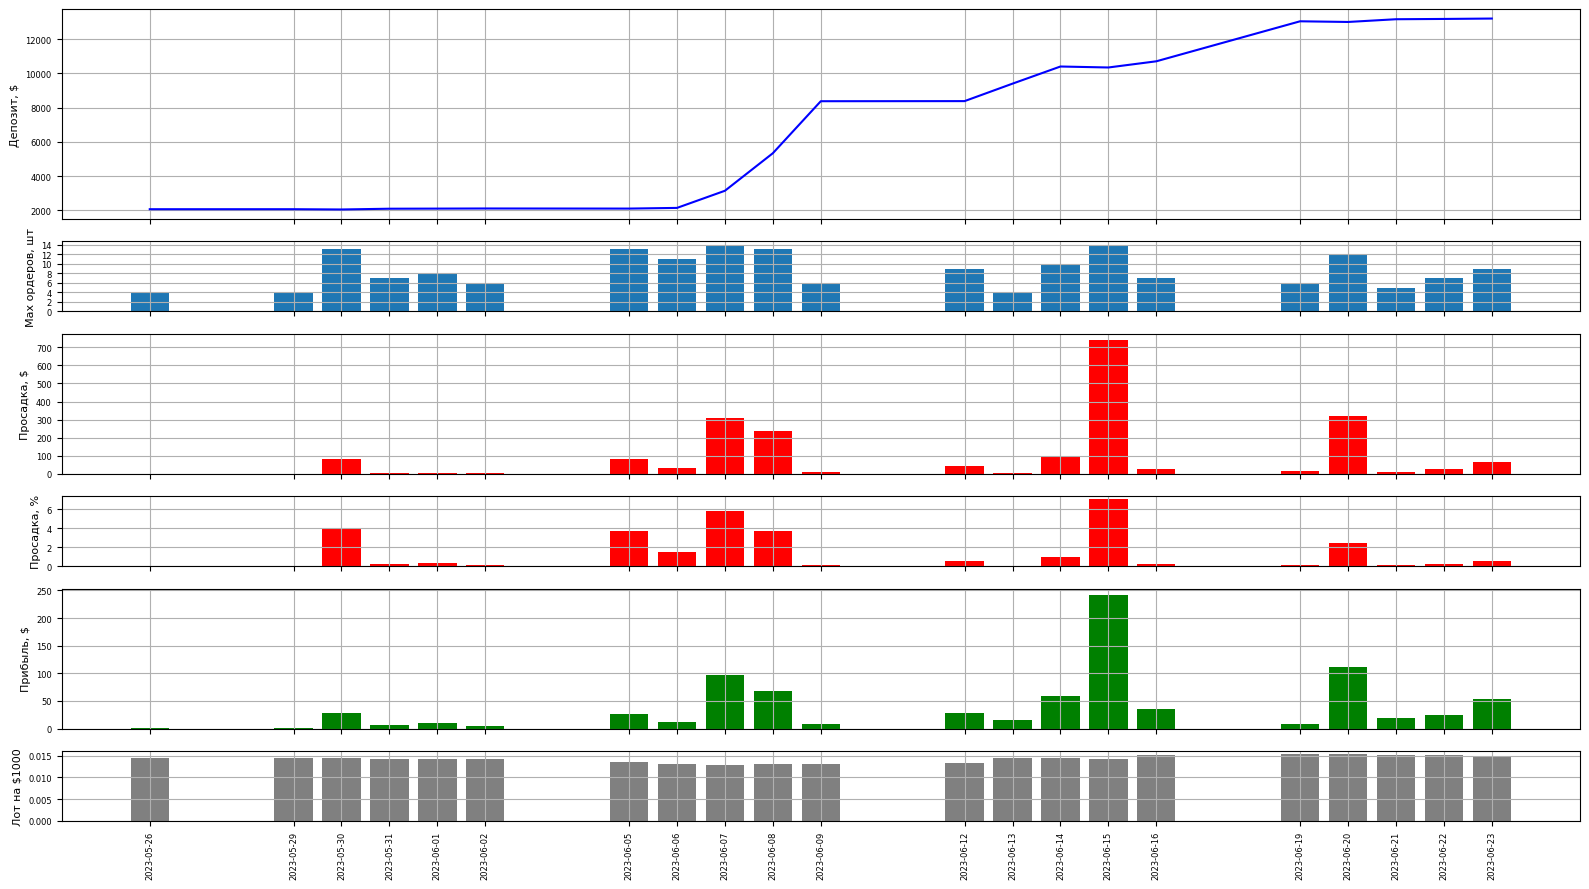

In [43]:
print(f"Период: {df_sum.iloc[0]['START_DATE']} - {df_sum.iloc[0]['FINISH_DATE']}")
print(f"Календарных дней: {df_sum.iloc[0]['CAL_DAYS']:,.0f}")
print(f"Торговых дней: {df_sum.iloc[0]['DAYS']:,.0f}")
print('')

print(f"Баланс: ${df_sum.iloc[0]['BALANCE']:,.2f}")
print(f"Пополнений: ${df_sum.iloc[0]['DK_DEPOSIT']:,.2f}") 
print(f"Снятий: ${df_sum.iloc[0]['DK_WITHDRAWAL']:,.2f}")
print(f"Прочие движения: ${df_sum.iloc[0]['DK_MISC_TRANS']:,.2f}")
print('')

print(f"Собственных средств: ${df_sum.iloc[0]['OWN_FUNDS']:,.2f}")
print('')

print(f"Прибыль: ${df_sum.iloc[0]['PROFIT']:,.2f}")
print(f"Средняя прибыль в календарный день: ${df_sum.iloc[0]['PROFIT_PER_CAL_DAY']:,.2f}")
print(f"Средняя прибыль в торговый день: ${df_sum.iloc[0]['PROFIT_PER_DAY']:,.2f}")
print('')

print(f"ROA: {df_sum.iloc[0]['ROA']*100:,.1f}%")
print(f"ROA календарных дней: {df_sum.iloc[0]['ROA_DAYS']:,.0f}")
print('')

print(f"ROI: {df_sum.iloc[0]['ROI']*100:,.1f}%")
print(f"ROI календарных дней: {df_sum.iloc[0]['ROI_DAYS']:,.0f}")
print('')

print(f"Ордеров: {df_sum.iloc[0]['ORDER_ID']:,.0f}")
print(f"Прибыльных: {df_sum.iloc[0]['HAS_ORDER_PROFIT']:,.0f}")
print(f"Win Rate: {df_sum.iloc[0]['WIN_RATE']*100:,.1f}%")
print(f"Прибыль ордера: AVG=${df_sum.iloc[0]['AVG_ORDER_PROFIT']:,.2f} | MAX=${df_sum.iloc[0]['MAX_ORDER_PROFIT']:,.2f}")
print(f"Убыток ордера: MAX=${df_sum.iloc[0]['MAX_ORDER_LOSS']:,.2f}")
print('')

print(f"Cеток однонаправленных: {df_sum.iloc[0]['GRID_CNT']:,.0f}")
print(f"Лот на $1000 депозита: MIN={df_sum.iloc[0]['MIN_LOT_1000']:,.4f} | AVG={df_sum.iloc[0]['AVG_LOT_1000']:,.4f} | MAX={df_sum.iloc[0]['MAX_LOT_1000']:,.4f} | LAST={df_sum.iloc[0]['LAST_LOT_1000']:,.4f}")
print(f"Ордеров в сетке: AVG={df_sum.iloc[0]['AVG_GRID_ORDER_CNT']:,.1f} | MAX={df_sum.iloc[0]['MAX_GRID_ORDER_CNT']:,.0f}")
print(f"Длительность сетки: MIN={df_sum.iloc[0]['MIN_GRID_DURATION']}| AVG={df_sum.iloc[0]['AVG_GRID_ORDER_CNT']:,.1f} | MAX={df_sum.iloc[0]['MAX_GRID_ORDER_CNT']:,.0f}")
print(f"Прибыль сетки: AVG=${df_sum.iloc[0]['AVG_GRID_PROFIT']:,.2f} | MAX=${df_sum.iloc[0]['MAX_GRID_PROFIT']:,.2f}")
print(f"Просадка сетки: AVG=-${df_sum.iloc[0]['AVG_GRID_DRAWDOWN']:,.2f} | MAX=-${df_sum.iloc[0]['MAX_GRID_DRAWDOWN']:,.2f}")
print(f"Просадка сетки от депозита: AVG={df_sum.iloc[0]['AVG_GRID_DRAWDOWN_RATIO']*100:,.1f}% | MAX={df_sum.iloc[0]['MAX_GRID_DRAWDOWN_RATIO']*100:,.1f}%")

import datetime
fig = an.get_summary_chart(df_grids)


# 03. TOP-5 biggest grid drawdowns 

In [3]:
df_grids.sort_values(by=['DK_DRAWDOWN_RATIO'], ascending=False).head(5)

,DK_GRID_ID,OPEN_DT,CLOSE_DT,ORDER_ID,PROFIT,DK_GRID_OPEN_QTY,QTY,OPEN_PRICE,DK_GRID_LAST_PRICE,DK_OPEN_VALUE,DK_WORST_PRICE,DK_BALANCE_IN,DK_GRID_AVG_PRICE,DK_DRAWDOWN,DK_EQUITY,DK_DRAWDOWN_RATIO,DK_DRAWDOWN_20,DK_DRAWDOWN_20_RATIO,DK_EQUITY_20,DK_LOT_1000
354,72718771,2023-06-15 15:29:02,2023-06-15 17:55:07,14,195.8928,0.15,130.83,1926.29,1958.57,255735.6654,1960.36,10501.7552,1954.717308,738.2334,9763.5218,0.070296,12139.711409,1.155970,-1637.956209,0.014283
196,71462744,2023-06-07 16:54:00,2023-06-07 20:52:00,14,90.4457,0.07,58.57,1968.93,1941.51,113915.4736,1939.72,5246.0257,1944.945767,306.0732,4939.9525,0.058344,5007.823306,0.954594,238.202394,0.013343
29,70146186,2023-05-30 08:54:02,2023-05-30 16:00:20,13,24.0149,0.03,15.69,1932.26,1959.51,30691.3751,1961.30,2077.3757,1956.110586,81.4219,1995.9538,0.039195,2383.874548,1.147541,-306.498848,0.014441
132,70923675,2023-06-02 17:41:00,2023-06-05 12:41:38,13,24.7406,0.03,15.69,1966.89,1939.90,30488.2300,1938.11,2123.8088,1943.163161,79.2841,2044.5247,0.037331,2279.338748,1.073232,-155.529948,0.014126
209,71560632,2023-06-07 22:58:01,2023-06-08 20:12:32,13,64.1212,0.08,42.71,1940.43,1969.08,83941.0089,1970.87,6329.0320,1965.371316,234.8488,6094.1832,0.037107,6502.391986,1.027391,-173.359986,0.012640


# 04. Worst Market Model: TOP-5 potential drawdowns of biggest (>=13 orders) grids

Модель предполагает, что реальные сетки размером >13 ордеров не закрылись, а продолжили рост до 20 ордеров. При этом цена каждый раз двигалась бы в худшем направлении против нас.

Показаны TOP-5 сеток достроенных до 20 ордеров с их _потенциальными просадками_.

Смотри колонки:
- DK_DRAWDOWN_20 - какая будет просадка в USD
- DK_DRAWDOWN_20_RATIO - % просадки от начального депозита сетки.
- DK_EQUITY_20 - свободные средства от депозита (<0 - сумму нужно доливать)

In [4]:
df_grids[df_grids['ORDER_ID'] >= 13].sort_values(by=['DK_DRAWDOWN_20_RATIO'], ascending=False).head(5)

,DK_GRID_ID,OPEN_DT,CLOSE_DT,ORDER_ID,PROFIT,DK_GRID_OPEN_QTY,QTY,OPEN_PRICE,DK_GRID_LAST_PRICE,DK_OPEN_VALUE,DK_WORST_PRICE,DK_BALANCE_IN,DK_GRID_AVG_PRICE,DK_DRAWDOWN,DK_EQUITY,DK_DRAWDOWN_RATIO,DK_DRAWDOWN_20,DK_DRAWDOWN_20_RATIO,DK_EQUITY_20,DK_LOT_1000
354,72718771,2023-06-15 15:29:02,2023-06-15 17:55:07,14,195.8928,0.15,130.83,1926.29,1958.57,255735.6654,1960.36,10501.7552,1954.717308,738.2334,9763.5218,0.070296,12139.711409,1.155970,-1637.956209,0.014283
29,70146186,2023-05-30 08:54:02,2023-05-30 16:00:20,13,24.0149,0.03,15.69,1932.26,1959.51,30691.3751,1961.30,2077.3757,1956.110586,81.4219,1995.9538,0.039195,2383.874548,1.147541,-306.498848,0.014441
132,70923675,2023-06-02 17:41:00,2023-06-05 12:41:38,13,24.7406,0.03,15.69,1966.89,1939.90,30488.2300,1938.11,2123.8088,1943.163161,79.2841,2044.5247,0.037331,2279.338748,1.073232,-155.529948,0.014126
209,71560632,2023-06-07 22:58:01,2023-06-08 20:12:32,13,64.1212,0.08,42.71,1940.43,1969.08,83941.0089,1970.87,6329.0320,1965.371316,234.8488,6094.1832,0.037107,6502.391986,1.027391,-173.359986,0.012640
196,71462744,2023-06-07 16:54:00,2023-06-07 20:52:00,14,90.4457,0.07,58.57,1968.93,1941.51,113915.4736,1939.72,5246.0257,1944.945767,306.0732,4939.9525,0.058344,5007.823306,0.954594,238.202394,0.013343


# 06. Worst Market Model: TOP-5 potential drawdowns of all grids (incl. small)


Модель такая же как и выше. Только до 20 ордера достроены все сетки, включая малые (1, 2, 3... ордера).

_Потенциальные просадки_ малых сеток больше, чем у больших, потому что цена двигалась бы в худшем направлении гораздо больше раз.

По этим сетка можно оценить самый апокалиптический сценарий.

In [5]:
df_grids.sort_values(by=['DK_EQUITY_20'], ascending=True).head(5)

,DK_GRID_ID,OPEN_DT,CLOSE_DT,ORDER_ID,PROFIT,DK_GRID_OPEN_QTY,QTY,OPEN_PRICE,DK_GRID_LAST_PRICE,DK_OPEN_VALUE,DK_WORST_PRICE,DK_BALANCE_IN,DK_GRID_AVG_PRICE,DK_DRAWDOWN,DK_EQUITY,DK_DRAWDOWN_RATIO,DK_DRAWDOWN_20,DK_DRAWDOWN_20_RATIO,DK_EQUITY_20,DK_LOT_1000
372,72858693,2023-06-16 07:50:00,2023-06-16 16:00:05,7,7.8639,0.2,5.24,1955.09,1966.96,10291.0495,1968.75,13004.6950,1963.940744,25.2005,12979.4945,0.001938,15998.671998,1.230223,-2993.976998,0.015379
379,72919383,2023-06-16 15:16:01,2023-06-16 16:43:06,6,5.0588,0.2,3.26,1967.44,1957.20,6390.6374,1955.41,13015.0757,1960.318221,16.0008,12999.0749,0.001229,16004.752495,1.229709,-2989.676795,0.015367
407,73141080,2023-06-20 04:55:00,2023-06-20 13:25:53,6,4.9668,0.2,3.26,1945.26,1955.71,6365.4224,1957.50,13048.1606,1952.583558,16.0276,13032.1330,0.001228,16025.110095,1.228151,-2976.949495,0.015328
398,73061176,2023-06-19 11:24:02,2023-06-19 16:31:04,6,4.8829,0.2,3.26,1958.66,1948.58,6361.2777,1946.79,13037.9823,1951.312178,14.7423,13023.2400,0.001131,16006.010995,1.227645,-2968.028695,0.015340
457,73500770,2023-06-21 21:33:01,2023-06-22 15:30:38,7,7.9500,0.2,5.24,1937.59,1924.90,10103.6256,1923.11,13176.1802,1928.172824,26.5292,13149.6510,0.002013,15965.701498,1.211709,-2789.521298,0.015179


/var/folders/9m/tth9zlt910549vvdqgrwg7rh0000gn/T/ipykernel_24330/2010260726.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


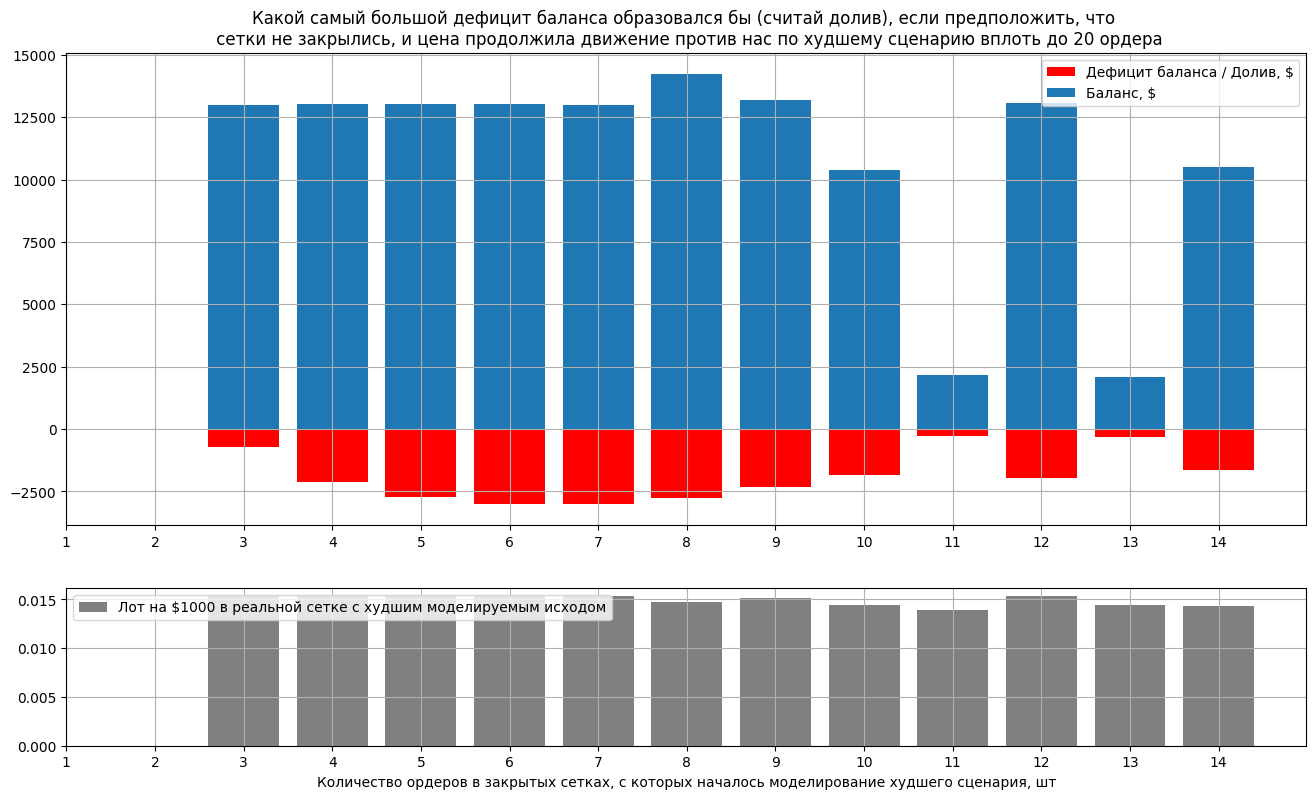

In [6]:
fig = an.get_worst_equity_20_chart(df_grids=df_grids)
fig.show()

# 07.1. Order price distance of grid

In [37]:
df_pd = df_orders.copy()

df_pd = an.get_new_order_params(df_pd)
df_pd = df_pd[['DK_GRID_ORDER_NUM', 'DK_OPEN_PRICE_DELTA_MIN', 'DK_OPEN_PRICE_DELTA_MEAN', 'DK_OPEN_PRICE_DELTA_MAX']]
df_pd[['DK_OPEN_PRICE_DELTA_MIN', 'DK_OPEN_PRICE_DELTA_MEAN', 'DK_OPEN_PRICE_DELTA_MAX']] = df_pd[['DK_OPEN_PRICE_DELTA_MIN', 'DK_OPEN_PRICE_DELTA_MEAN', 'DK_OPEN_PRICE_DELTA_MAX']].applymap('{0:.2f}'.format)
df_pd


,DK_GRID_ORDER_NUM,DK_OPEN_PRICE_DELTA_MIN,DK_OPEN_PRICE_DELTA_MEAN,DK_OPEN_PRICE_DELTA_MAX
0,1->2,1.62,2.12,4.14
1,2->3,1.58,2.18,7.87
2,3->4,1.61,2.21,4.84
3,4->5,1.67,2.26,6.59
4,5->6,1.75,2.30,4.17
5,6->7,1.80,2.29,3.96
6,7->8,1.69,2.16,3.68
7,8->9,1.79,2.24,3.77
8,9->10,1.42,2.30,3.26
9,10->11,1.95,2.50,3.13


# 07.2. Order quantity factor of grid

In [35]:
df_pd = df_orders.copy()

df_pd = an.get_new_order_params(df_pd)
df_pd = df_pd[['DK_GRID_ORDER_NUM', 'DK_QTY_FACTOR_DOC', 'DK_QTY_FACTOR_MEAN', 'DK_QTY_FACTOR_MAX']]
df_pd[['DK_QTY_FACTOR_DOC', 'DK_QTY_FACTOR_MEAN', 'DK_QTY_FACTOR_MAX']] = df_pd[['DK_QTY_FACTOR_DOC', 'DK_QTY_FACTOR_MEAN', 'DK_QTY_FACTOR_MAX']].applymap('{0:.2f}'.format)
df_pd


,DK_GRID_ORDER_NUM,DK_QTY_FACTOR_DOC,DK_QTY_FACTOR_MEAN,DK_QTY_FACTOR_MAX
0,1->2,1.10,1.07,1.20
1,2->3,1.50,1.57,1.67
2,3->4,1.51,1.55,1.60
3,4->5,1.56,1.54,1.57
4,5->6,1.58,1.58,1.59
5,6->7,1.61,1.62,1.63
6,7->8,1.65,1.65,1.65
7,8->9,1.65,1.65,1.65
8,9->10,1.65,1.65,1.65
9,10->11,1.65,1.65,1.65


# 07.3. Order time distance of grid

IMPORATANT: Distances more then 1 day are ignored as over weekend delta.

In [40]:
df_pd = df_orders.copy()

df_pd = an.get_new_order_params(df_pd)
df_pd
df_pd = df_pd[['DK_GRID_ORDER_NUM', 'DK_DURATION_TD_MIN_NO_EXTRADAY', 'DK_DURATION_TD_MEAN_NO_EXTRADAY', 'DK_DURATION_TD_MAX_NO_EXTRADAY']]
# df_pd[['DK_QTY_FACTOR_DOC', 'DK_QTY_FACTOR_MEAN', 'DK_QTY_FACTOR_MAX']] = df_pd[['DK_QTY_FACTOR_DOC', 'DK_QTY_FACTOR_MEAN', 'DK_QTY_FACTOR_MAX']].applymap('{0:.2f}'.format)
df_pd


,DK_GRID_ORDER_NUM,DK_DURATION_TD_MIN_NO_EXTRADAY,DK_DURATION_TD_MEAN_NO_EXTRADAY,DK_DURATION_TD_MAX_NO_EXTRADAY
0,1->2,0 days 00:00:59,0 days 00:30:41.040540540,0 days 03:39:00
1,2->3,0 days 00:01:00,0 days 00:33:09.108333333,0 days 04:21:01
2,3->4,0 days 00:02:00,0 days 01:04:13.670886075,0 days 08:41:00
3,4->5,0 days 00:01:04,0 days 00:53:53.420000,0 days 09:16:00
4,5->6,0 days 00:02:00,0 days 01:00:40.555555555,0 days 04:34:59
5,6->7,0 days 00:00:45,0 days 00:47:59.454545454,0 days 04:02:59
6,7->8,0 days 00:01:00,0 days 00:22:18.214285714,0 days 02:10:02
7,8->9,0 days 00:01:09,0 days 01:18:05.090909090,0 days 10:15:00
8,9->10,0 days 00:05:01,0 days 01:26:56.500000,0 days 04:15:51
9,10->11,0 days 00:07:29,0 days 00:56:03.571428571,0 days 04:39:00
